# Analisando os dados do Hospital Sírio Libanes  
Agora que já limpamos os dados, está na hora de conhecermos melhor o nosso dataset antes de desenvolvermos o modelo.  
Nesse ponto, vamos avaliar quais são os fatores que está ligado diretamente com o objetivo desse projeto, que é desenvolver um modelo para predizer se o paciente necessitará ser internado na UTI ou não.

### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Definições Auxiliares  

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

%matplotlib inline

In [53]:
def plotar_grafico_comparacao(variavel, titulo_grafico):
    """
    Separa uma variável e para realizar a comparação com as internações
    e plotar o gráfico de barras
    """
    
    
    df_comparacao = dados_clinicos.groupby([f'{variavel}', 'ICU'])['ICU'].count()
    ax = df_comparacao.unstack().plot(kind='bar', color=[BLUE2, RED1], figsize=(10, 6))
    
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.title(titulo_grafico, fontsize=24)
    plt.legend(['não-internado', 'internado'])
    plt.ylabel('Pacientes')
    
    plt.yticks(np.arange(0, 181, 30))

#### Carregando os dados

In [3]:
dados_clinicos = pd.read_csv('./dados/dados_ajustados.csv')
dados_clinicos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,3,0,40th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,4,0,10th,0,0,0,0,0,0,0,...,-0.952381,-0.979798,-1.00000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
2,5,0,10th,0,0,0,0,0,0,0,...,-0.976190,-0.979798,-0.86087,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
3,6,1,70th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,7,0,20th,0,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0


## A Análise  
Antes vamos verificar a quantidade de de internações na unidade de terapia intensiva:


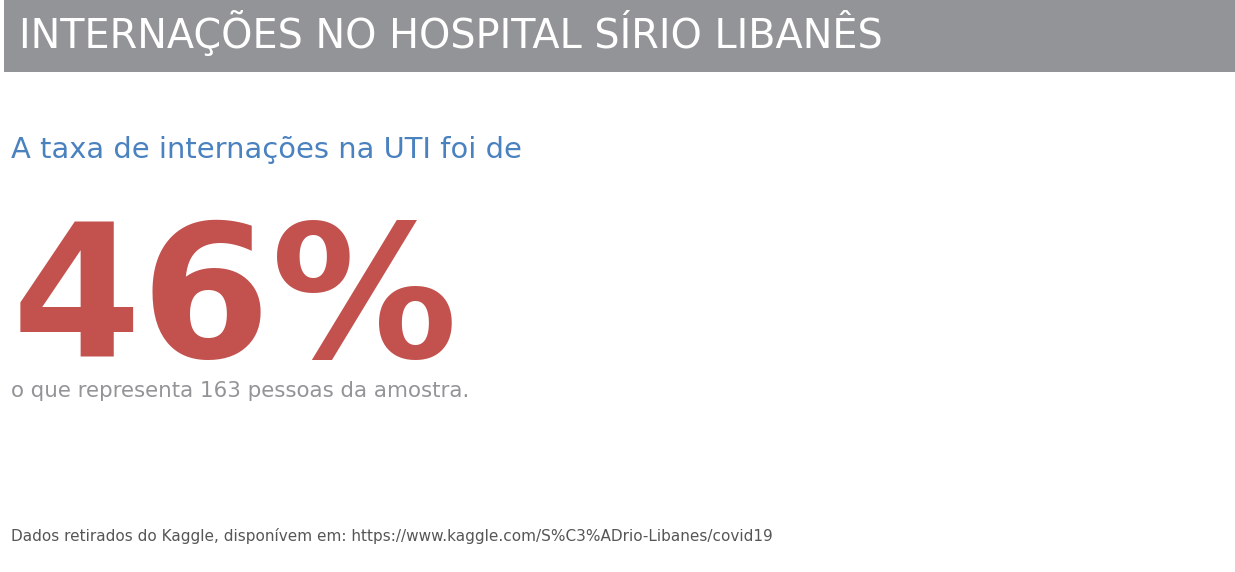

In [35]:
# create new figure
plt.figure(figsize=(10, 6), # width, height in inches
           dpi=110)         # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)


# titile the plot
plt.text(0.0099, 1.03,
         'INTERNAÇÕES NO HOSPITAL SÍRIO LIBANÊS'+' '*27,
         fontsize=26,
         color='white',
         bbox={'facecolor': GRAY7, 'pad': 10, 'edgecolor': 'none'}
         )

# footnote with the data source
plt.text(0, 0.04,
         'Dados retirados do Kaggle, '
         'disponívem em: https://www.kaggle.com/S%C3%ADrio-Libanes/covid19',
         fontsize=10,
         color=GRAY3)

# add note to the plot
plt.text(0, 0.81,
         'A taxa de internações na UTI foi de',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(0, 0.41,
         '$\\bf{46\%}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=RED1)


# add note to the plot
plt.text(0, 0.33,
         'o que representa 163 pessoas da amostra.',
         fontsize=14,
         color=GRAY7)


plt.show()

A distribuição de internações é quase homogênea, o que facilitará no desenvolvimento do modelo posteriormente.  
Agora, vamos analisar se podemos correlacionar o internação com mais variáveis.

### Comparação por Gênero

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


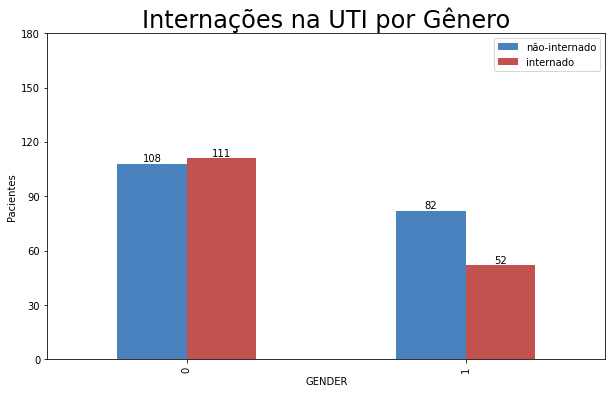

In [54]:
titulo = 'Internações na UTI por Gênero'
plotar_grafico_comparacao('GENDER', titulo)

Segundo o [informações](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19/discussion/164019) dos próprios criadores do datset, o valor 0 foi atribuído ao gênero masculino e o 1 para o Feminino.  
Além do tamanho da amostra masculina ser ligeiramente maior, podemos observar que no geral eles precisam mais internações do que as mulheres.

### Faixa Etária

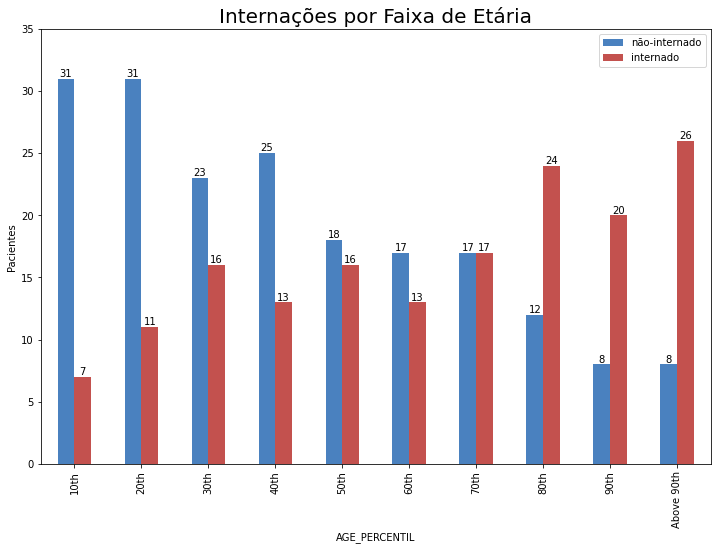

In [52]:
internacoes_por_faixa_idade = dados_clinicos.groupby(['AGE_PERCENTIL', 'ICU'])[['ICU']].count()
ax = internacoes_por_faixa_idade.unstack().plot(kind='bar', color=[BLUE2, RED1], 
                                           figsize=(12, 8))

for container in ax.containers:
        ax.bar_label(container)

plt.title('Internações por Faixa de Etária', fontsize=20)
plt.legend(['não-internado', 'internado'])
plt.yticks(np.arange(0, 36, 5))
plt.ylabel('Pacientes')

plt.show()

Avaliando as internações por faixa etária, podemos confirmar o senso de que os mais idosos são mais vulneráveis a essa doença. Quanto mais novo for o paciente, menor é a chance dele precisar ser internado na UTI, e esse dado vai se invertendo conforme a faixa etária aumenta. O paciente com mais de 90 anos quase 61% a mais de chance de ser interado que um adulto (faixa dos 30 anos).

### Condição Preexistentes  
No dataset temos disponível 9 agrupamento de doenças preexistentes no paciente, aqui vamos focar somente nos 3 mais recorrentes.

In [55]:
grupo_doencas = ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 
                 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
                 'HTN', 'IMMUNOCOMPROMISED', 'OTHER']

In [56]:
dados_clinicos[grupo_doencas].sum().sort_values(ascending=False)

OTHER                 294
HTN                    68
IMMUNOCOMPROMISED      57
DISEASE GROUPING 5     45
DISEASE GROUPING 1     37
DISEASE GROUPING 3     32
DISEASE GROUPING 6     15
DISEASE GROUPING 2      8
DISEASE GROUPING 4      7
dtype: int64

Vamos avaliar somente então o grupo de doenças variadas (other), HTN (Pressão alta) e Imunodeficiencia

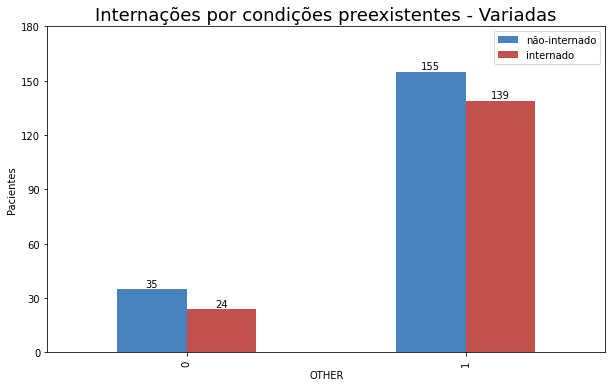

In [11]:
titulo = 'Internações por condições preexistentes - Variadas'
plotar_grafico_comparacao('OTHER', titulo)

Como não sabemos o que pode estar dentro da categoria de outros, não é possível fazer grandes inferencias.

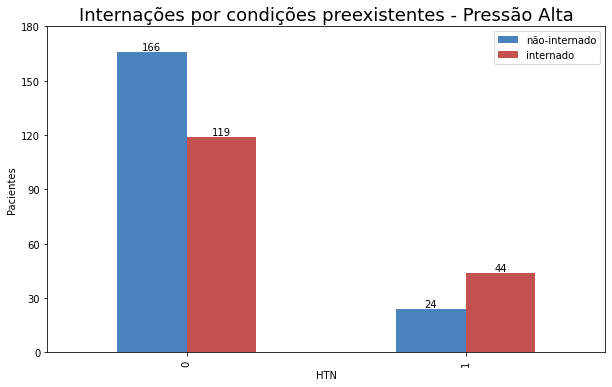

In [12]:
titulo = 'Internações por condições preexistentes - Pressão Alta'
plotar_grafico_comparacao('HTN', titulo)

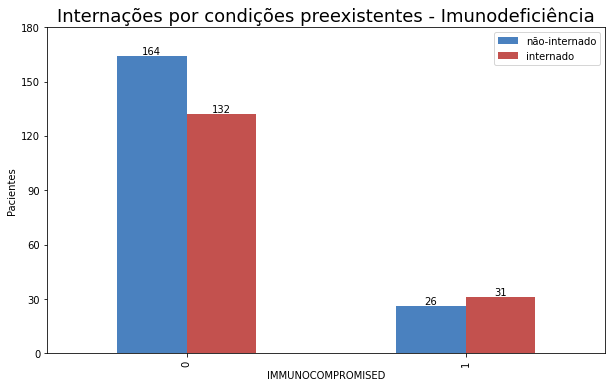

In [13]:
titulo = 'Internações por condições preexistentes - Imunodeficiência'
plotar_grafico_comparacao('IMMUNOCOMPROMISED', titulo)

E nos dois últimos gráficos podemos ver também que possuir grupo de doença pode aumentar a chance do paciente precisar de um leito - no caso dos imunodeficientes um pouco menos.

### Correlação 
Já que analisamos os fatores de forma isolada, vamos verificar se a correlação de fato existe.

In [62]:
features_para_analisar = ['GENDER', 'AGE_PERCENTIL', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 
                          'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 
                          'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ICU']

<AxesSubplot:>

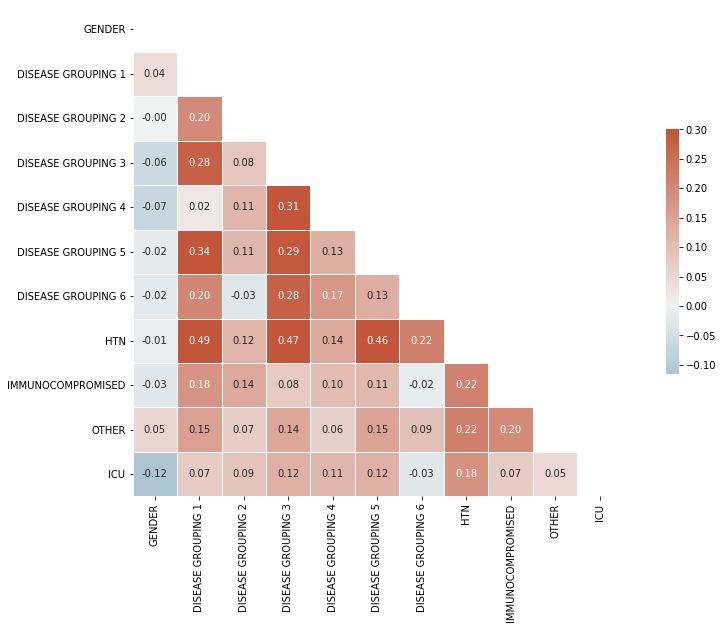

In [68]:
corr = dados_clinicos[features_para_analisar].corr()
mask = np.triu(np.ones_like(corr, dtype='bool'))
f, ax = plt.subplots(figsize=(16, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')


Podemos notar que, nenhuma das colunas tem alta correção com a internação. Como são 231 colunas ficaria inviável plotar todos.

## Conclusão  
Apesar de vermos graficamente algumas possível correlação com o fato de ser internado ou não, não foi possível observar o mesmo comportamento verificando sistemicamente.
Mas as informações obtidas não deixam de ser relevantes.
Vamos partir para o desenvolvimento do modelo e verificar como podemos solucionar o problema que é predizer a internação.